In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score


In [2]:
#Using random seed for reproducibility
seed=7
np.random.seed(seed)

In [3]:

df_forest = pd.read_csv('forestfires.csv')
df_forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### EDA and Visualization

In [4]:
df= df_forest

In [5]:
#Checking for duplicate values
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
#droping the dupplicate values
df.drop_duplicates(inplace=True)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

In [9]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
df.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],axis=1, inplace=True)

In [11]:
df['month'].replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                  (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df['day'].replace(('mon','tue','wed','thu','fri','sat','sun'),
               (1,2,3,4,5,6,7), inplace=True)
df['size_category'].replace(('small', 'large'),(1,2),inplace=True)

In [12]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,2
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,2
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,2
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [13]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [14]:
df.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,7.481336,4.251473,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,1.271120
std,2.283574,2.079053,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.444975
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,1.000000
25%,7.000000,2.000000,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,1.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,1.000000
75%,9.000000,6.000000,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,2.000000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,2.000000


<AxesSubplot:>

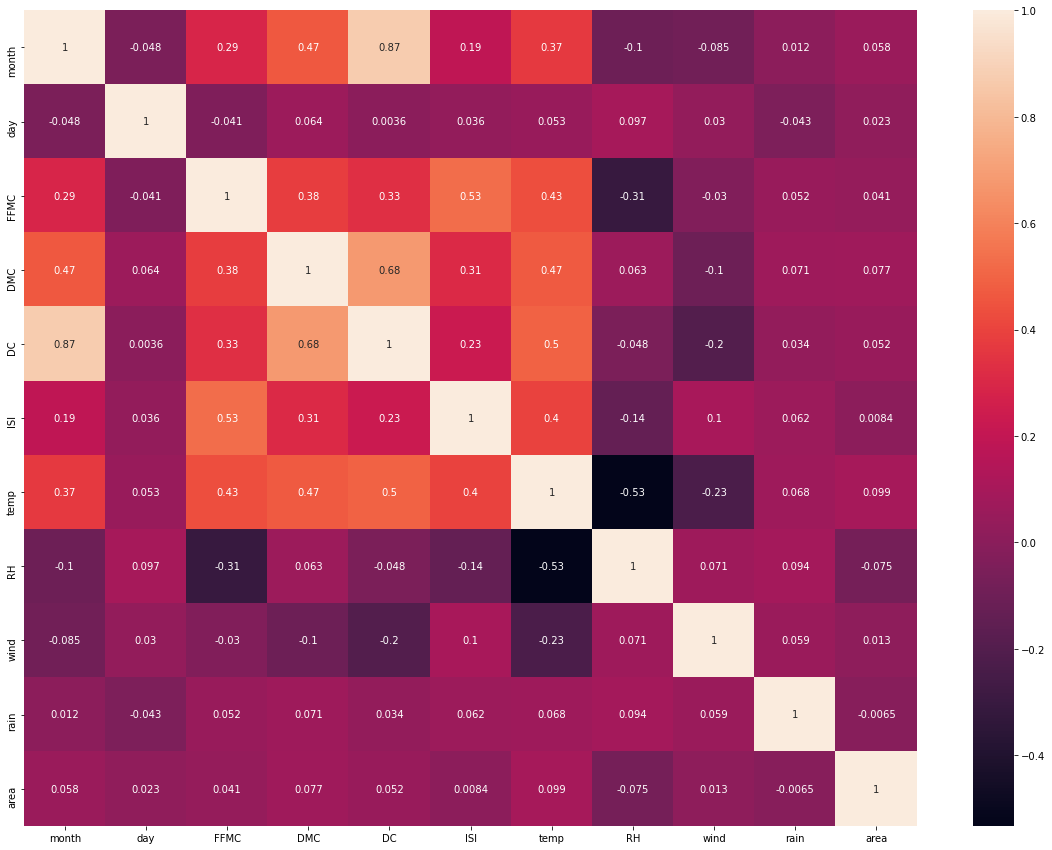

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,:11].corr(method='pearson'),annot=True)

Area is highly correllated with DMC, temp and RH

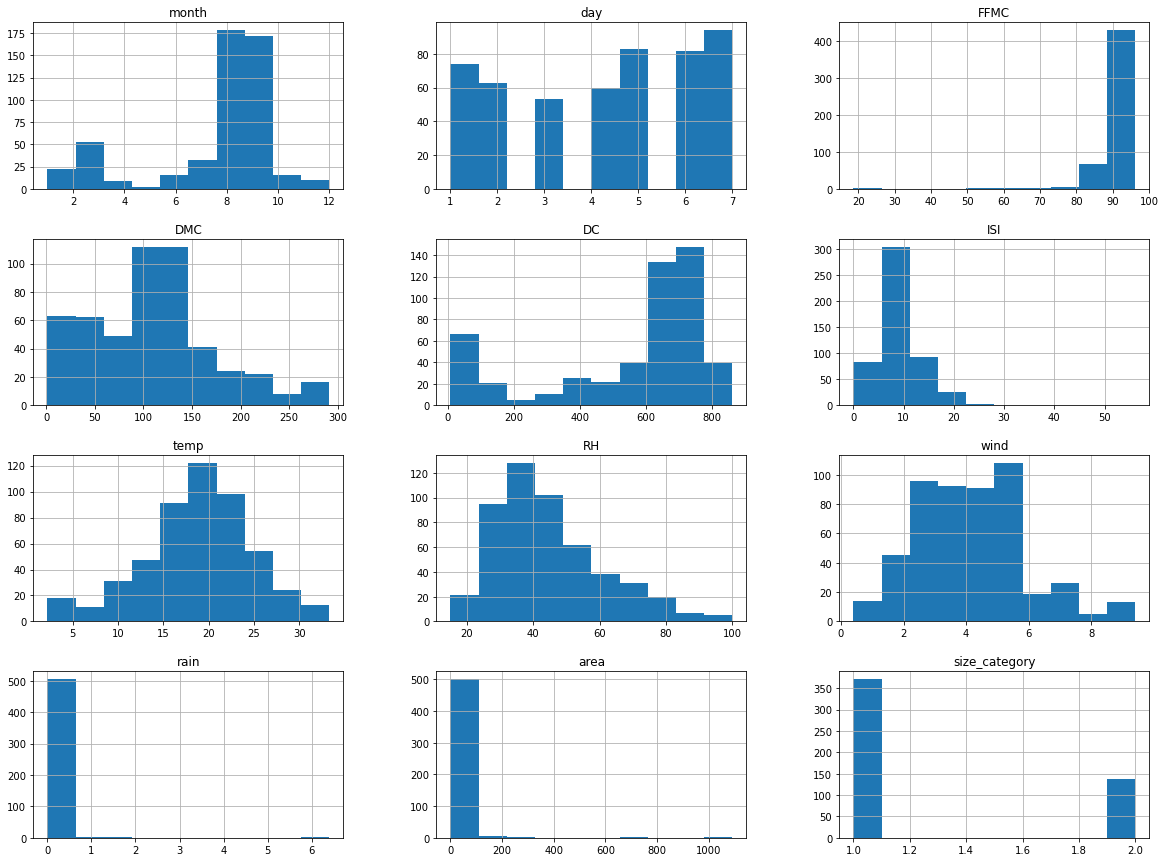

In [16]:
df.hist(figsize=(20,15));

'Temp' has near normal distribution. Other features has mixture of positive and negative skews

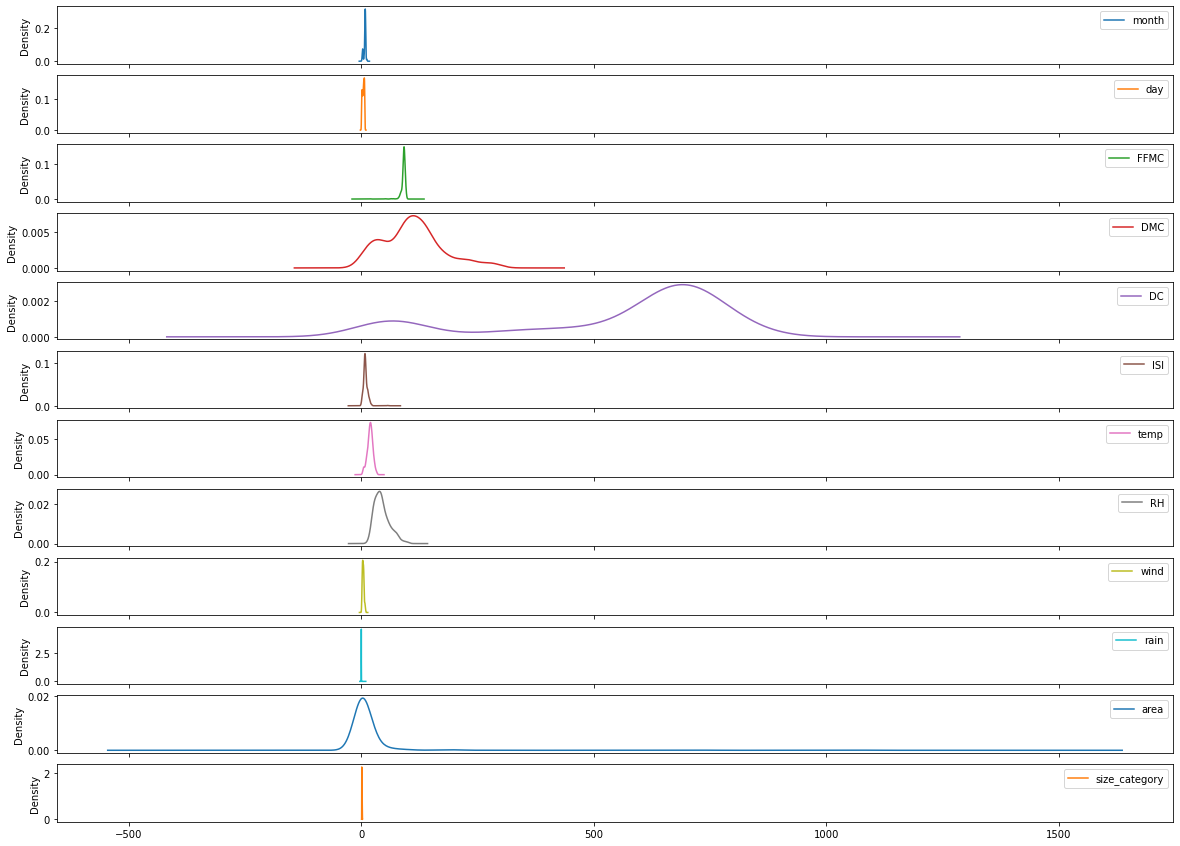

In [17]:
df.plot(kind='density', figsize=(20,15), subplots=True);

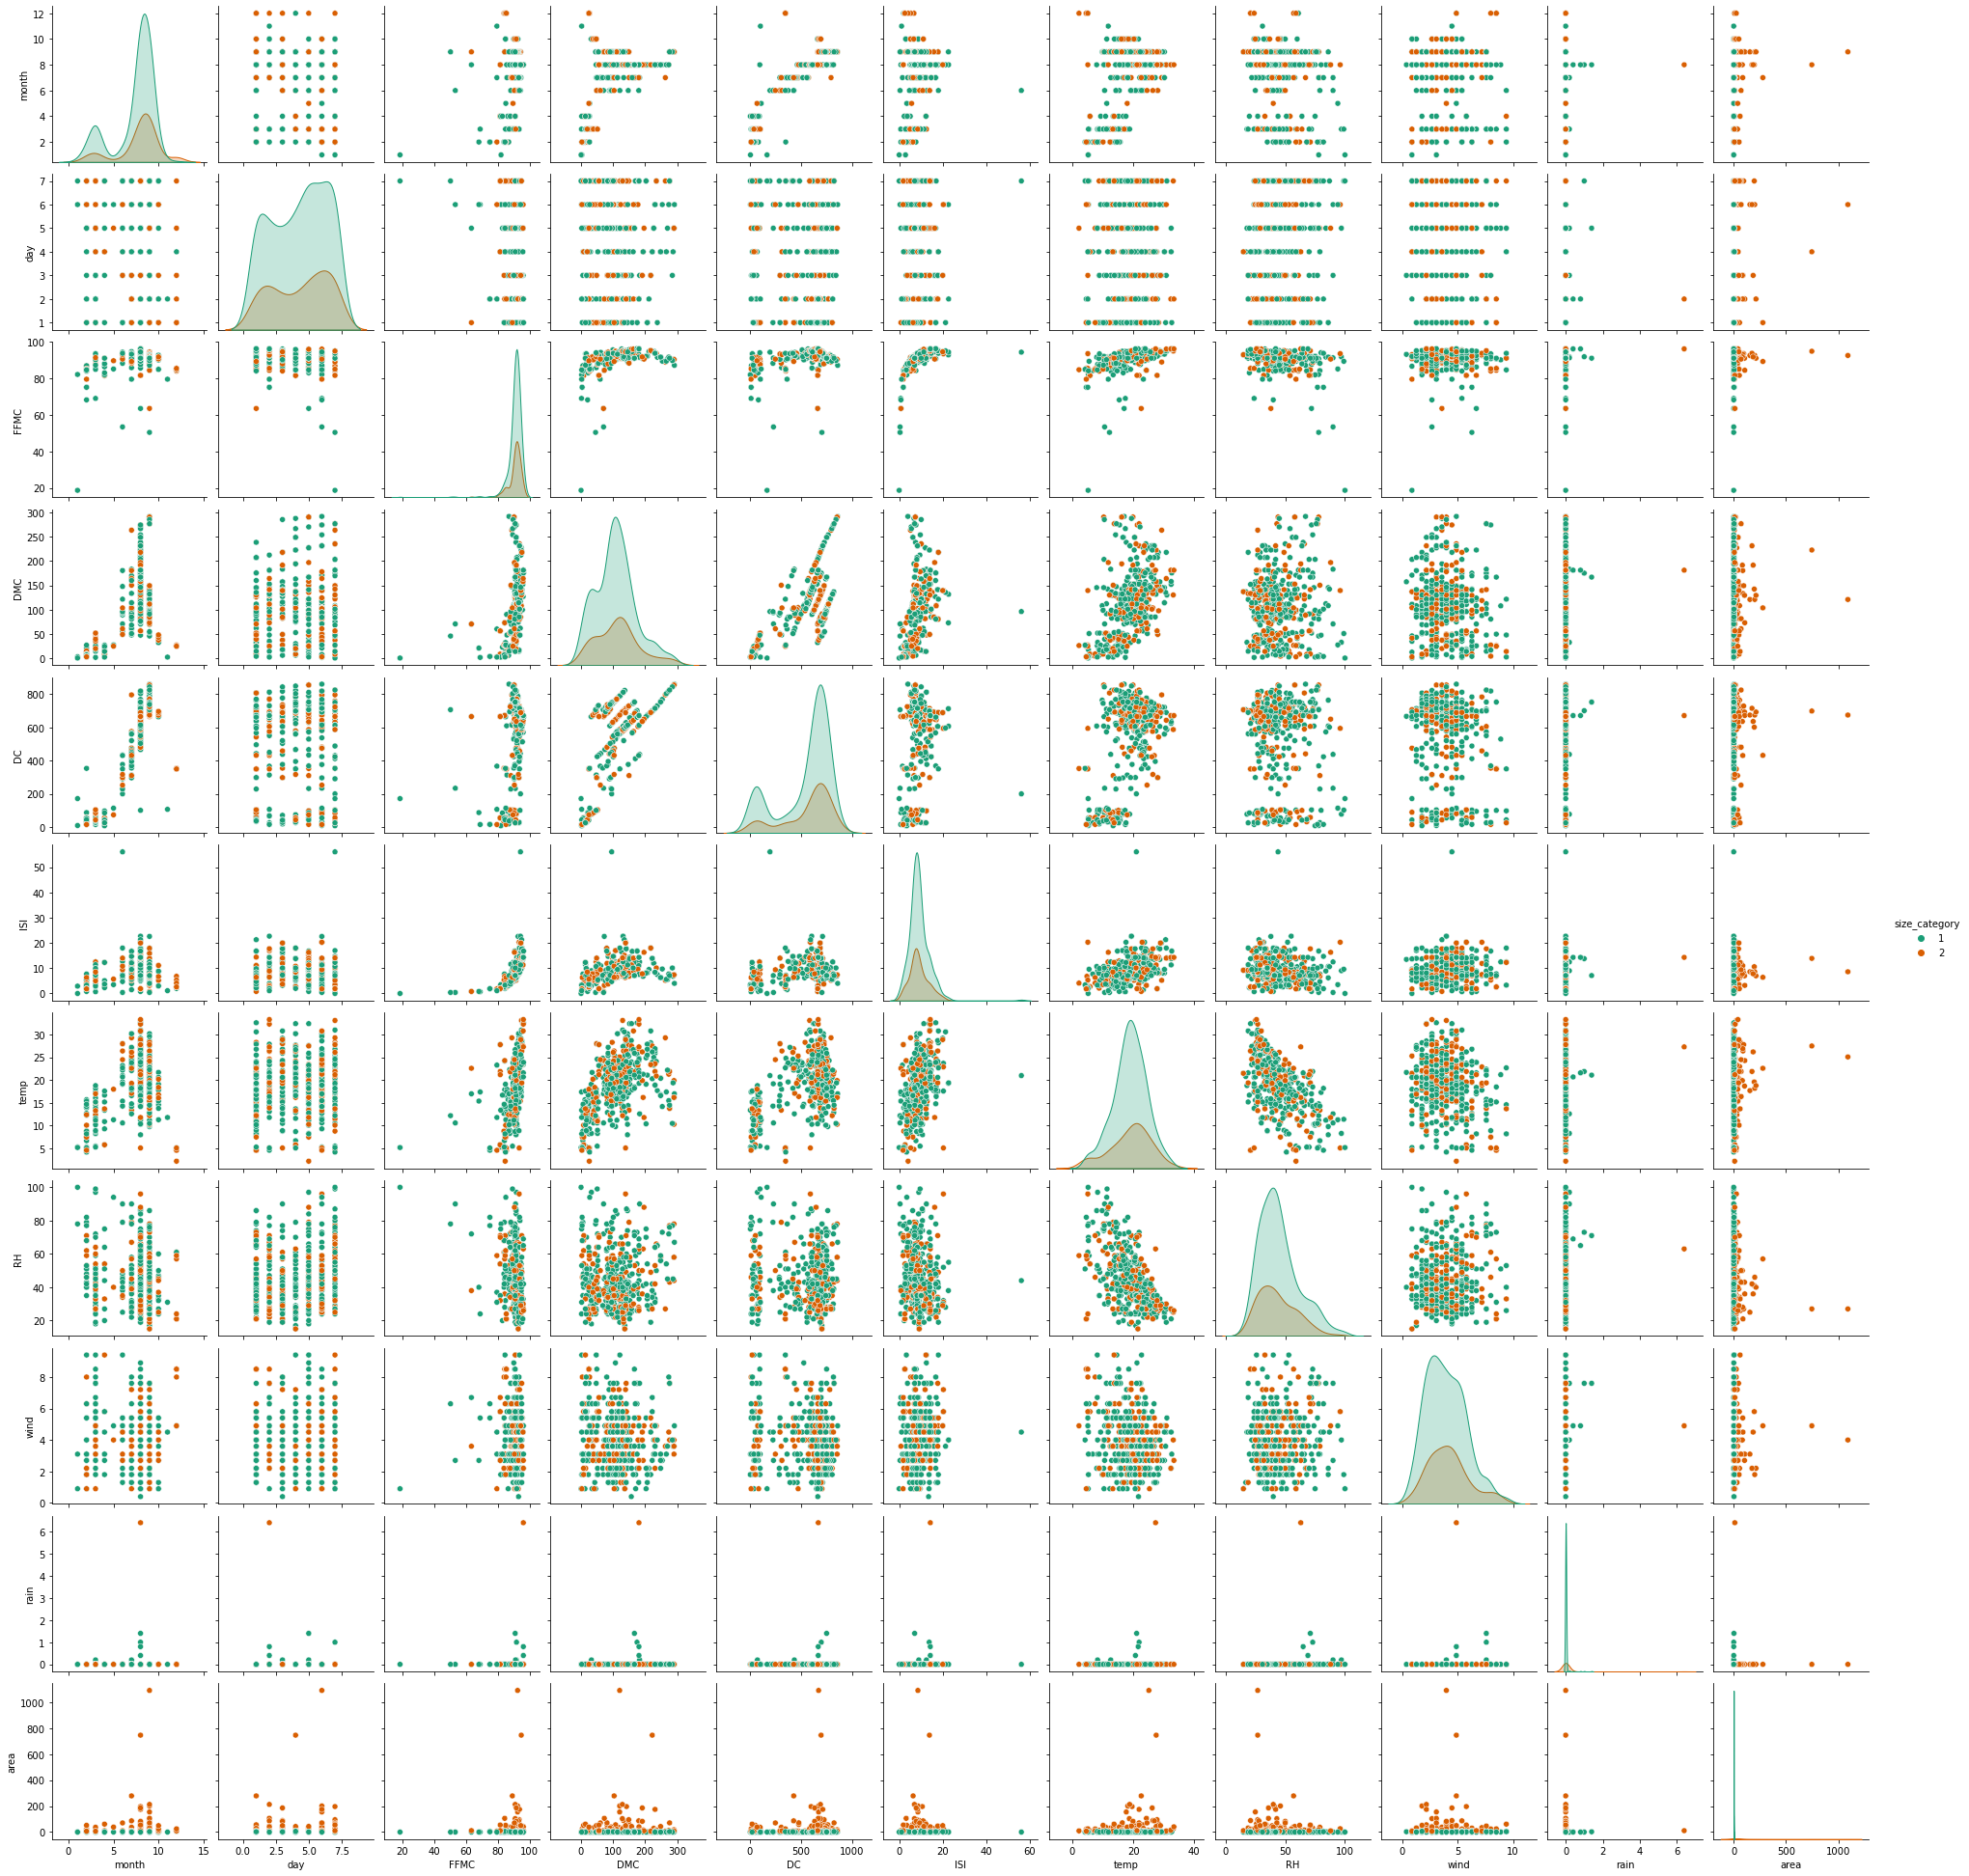

In [18]:
sns.pairplot(df,hue='size_category',palette='Dark2')

In [19]:
df.shape

(509, 12)

In [20]:
#splitting the data
X_temp1= df.iloc[:,2:11]
X_temp2=df.iloc[:,:2]
y= df.iloc[:,11]

In [21]:
X_temp1.reset_index(drop=True, inplace=True)
X_temp2.reset_index(drop=True, inplace=True)

In [22]:
normX=normalize(X_temp1)
X1= pd.DataFrame(normX,columns=['FFMC','DMC','DC','ISI',
                               'temp','RH','wind','rain','area'])
X=pd.concat([X_temp2,X1], axis=1)


In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [24]:
#kernel=linear
model_li = SVC(kernel='linear')
model_li.fit(x_train,y_train)
pred_li= model_li.predict(x_test)
np.mean(pred_li==y_test)

0.7843137254901961

In [25]:
#kernel=rbf
model_rbf= SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)
pred_rbf= model_rbf.predict(x_test)
np.mean(pred_rbf==y_test)

0.7516339869281046

In [26]:
#kernel=sigmoid
model_sig = SVC(kernel='sigmoid')
model_sig.fit(x_train,y_train)
pred_sig= model_sig.predict(x_test)
np.mean(pred_sig==y_test)

0.738562091503268

In [27]:
#kernel=poly
model_poly=SVC(kernel='poly')
model_poly.fit(x_train,y_train)
pred_poly= model_poly.predict(x_test)
np.mean(pred_poly==y_test)

0.7516339869281046